# Used Car Price Prediction with Machine Learning

This end-to-end data science project aims to predict the selling price of used cars using a variety of regression algorithms. We’ll perform detailed data preprocessing, feature engineering, model evaluation, and tuning using industry-grade best practices.

- **Dataset Size**: 19,980 records
- **Target Variable**: `selling_price`
- **Goal**: Help sellers/buyers make informed decisions using a reliable pricing model.


## Project Overview

This project focuses on building a predictive model to estimate the selling price of used cars based on various features such as year, mileage, fuel type, seller type, transmission, and more.

### Objective
To build a machine learning model that can predict the selling price of a used car with high accuracy. This helps sellers set competitive prices and buyers assess the fair market value.

### Tools & Technologies
- Programming Language: Python
- Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn
- Jupyter Notebook for development
- GitHub for version control and project sharing


## Dataset Information

The dataset contains information about used cars listed for sale. It includes various attributes that affect the selling price of a car.

### Key Features:

- **full_name**: Complete name of the car including brand and model
- **selling_price**: Price at which the car is being sold (Target variable)
- **year**: Manufacturing year of the car
- **seller_type**: Type of seller (Dealer or Individual)
- **km_driven**: Total distance the car has been driven (in kilometers)
- **fuel_type**: Type of fuel used (Petrol, Diesel, etc.)
- **transmission_type**: Type of transmission (Manual or Automatic)
- **mileage**: Fuel efficiency of the car (in kmpl)
- **engine**: Engine capacity (in CC)
- **max_power**: Maximum power output of the car 
- **seats**: Number of seats in the car

The **target variable** in this dataset is `selling_price`, which represents the price at which the car is being offered for resale.


##  Exploratory Data Analysis (EDA)

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Load the dataset
df = pd.read_csv('used-car-price.csv')

In [35]:
# Basic info
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [36]:
df.shape

(19980, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [38]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


In [39]:
df.isnull().sum()

full_name            0
selling_price        0
year                 0
seller_type          0
km_driven            0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64

### Key Observations

- No missing values were found in the dataset.
- The `selling_price` ranges widely, with a max value of ₹395 lakhs—potential outliers!
- Some columns like `mileage`, `engine`, and `max_power` have 0 values, which may indicate data issues.
- `seats` range from 2 to 14, which were later grouped for simplification.


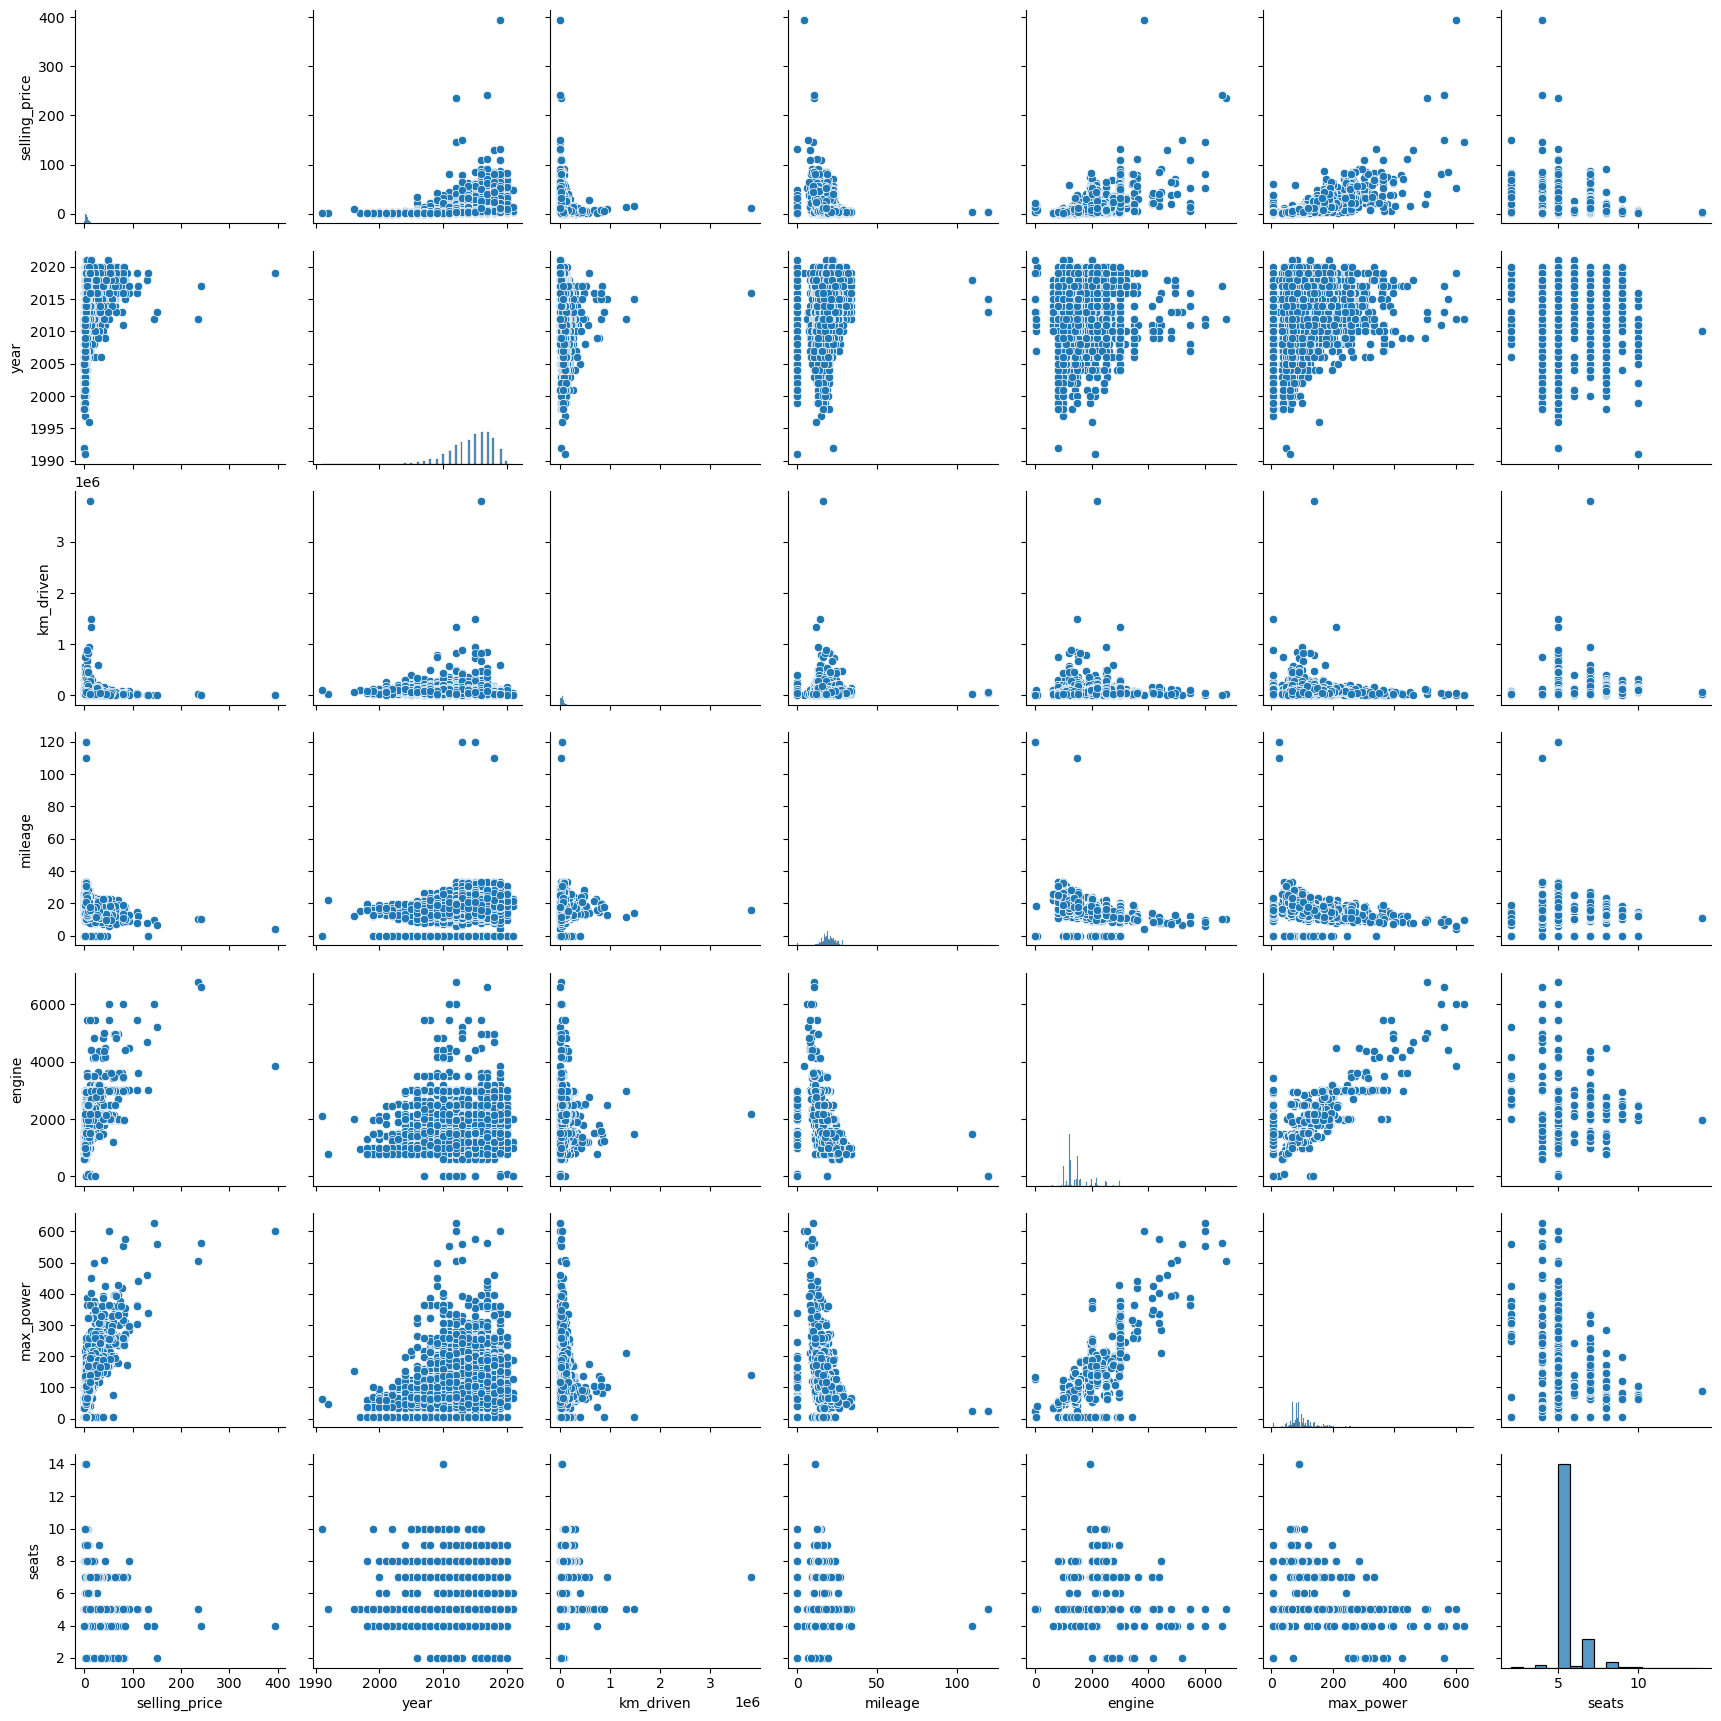

In [40]:
# Distribution of numerical features
sns.pairplot(df)
plt.show()

In [41]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

### Visual Insights

- The pairplot reveals visible positive trends between `engine`, `max_power`, `mileage`, and `selling_price`, indicating these features may be strong predictors.
- The `selling_price` distribution is right-skewed, suggesting the presence of high-value luxury vehicles or outliers.
- Strong correlation observed between:
  - `engine` and `max_power`
  - `max_power` and `selling_price`
- The `year` feature should be transformed into `age`, to make it more suitable for capturing the effect of car depreciation over time.
- The heatmap indicates that `age` has a negative correlation with `selling_price`, which aligns with domain knowledge — older cars tend to have lower resale value.


## Data Preprocessing and Feature Engineering

### 1. Preprocessing Steps

The `preprocess()` function is responsible for initial data cleaning and transformation:

- **Filtering**: Removes rows where `mileage` is zero.
- **Outlier Handling**: Caps the `selling_price` at the 95th percentile to handle extreme outliers.
- **Age Calculation**: Computes the age of the car by subtracting the manufacturing year from the current year.
- **Text Normalization**: Converts all values in `full_name` to uppercase to maintain consistency.
- **Seat Binning**: Groups seat counts into bins:
  - '2-4' for cars with 2 to 4 seats
  - '5' for cars with exactly 5 seats
  - '>5' for cars with more than 5 seats
- **Dropping Redundant Columns**: Drops the original `year` column as it is now represented in `age`.

### 2. Feature Engineering Steps

The `feature_engineering()` function extracts meaningful features and transforms the dataset:

- **Brand and Model Extraction**:
  - Extracts `make` (brand) and `model` from the `full_name` column.
- **One-Hot Encoding**:
  - Encodes categorical variables: `seller_type`, `fuel_type`, `transmission_type`, and `seats`.
- **Dropping Redundant Columns**:
  - Removes `full_name` after extracting required components.
- **Group-wise Median Encoding**:
  - Replaces `make` and `model` with the median `selling_price` of their respective groups, reducing high cardinality issues.
- **Feature Scaling**:
  - Applies Min-Max Scaling to normalize all numerical features between 0 and 1.

These steps ensure the dataset is cleaned, encoded, and scaled — making it suitable for training robust machine learning models.


In [42]:
def merge_seats(x):
    if 2 <= x <= 4:
        return '2-4'
    elif x > 5:
        return '>5'
    else:
        return '5'

def preprocess(df):
    df = df.loc[df.mileage != 0].copy()
    outlier_theshold = df.selling_price.quantile(0.95)
    df.loc[df.selling_price > outlier_theshold, 'selling_price'] = outlier_theshold
    df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']
    df['full_name'] = df['full_name'].str.upper()
    df['seats'] = df['seats'].apply(merge_seats)
    df.drop(columns=['year'])
    return df

def feature_engineering(df):
    df['make'] = df.full_name.apply(lambda x : x.split()[0])
    df['model'] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
    df.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    df['make'] = df.groupby('make')['selling_price'].transform('median')
    df['model'] = df.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

In [43]:
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.184371,0.042522,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.207231,0.225975,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.207231,0.120277,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.184371,0.093549,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.224624,0.300085,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [44]:
df.shape

(19820, 18)

## Model Building, Evaluation & Comparison

This section involves training multiple machine learning models to predict used car prices. We'll evaluate them using metrics like **R² Score**, **Mean Squared Error (MSE)**, and **cross-validation**, and then compare their performances to select the best one.

In [45]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

### Step 1: Train-Test Split & Linear Regression

We begin with splitting the dataset into training and test sets, followed by fitting a simple **Linear Regression** model:

- **`train_test_split()`** is used to split the dataset into 80% training and 20% testing.
- Linear Regression is trained and evaluated using R² Score and MSE.
- Cross-validation is applied using **KFold** to ensure model generalization.

This forms the baseline for further model comparisons.

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y_test,y_pred)

print(mse)

0.0031945622613290003


In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)

print(r2)

0.9439120936134157


In [51]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Train R²:", train_score)
print("Test R²:", test_score)


Train R²: 0.9416438813994951
Test R²: 0.9439120936134157


In [52]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(lr, X, y, cv=kf)

In [53]:
print(cv_results)

[0.94613886 0.93770918 0.94149559 0.93575198 0.94743111 0.94164305]


In [54]:
print(np.mean(cv_results), np.std(cv_results))

0.9416949605027282 0.004161320789836218


In [55]:
print(np.quantile(cv_results, [0.025, 0.975]))

[0.93599663 0.94726957]


### Observation: Linear Regression

- Achieved Test R² score of **0.94**, which is very good for a baseline model.
- Train and Test scores are close, indicating no significant overfitting.
- Model is stable across cross-validation folds (Mean CV R² ≈ 0.94, Std Dev ≈ 0.004).


### Step 2: Regularization Models - Ridge & Lasso

To improve over simple linear regression and reduce overfitting, we apply:

- **Ridge Regression**: L2 regularization, which penalizes large coefficients.
- **Lasso Regression**: L1 regularization, which can also eliminate less significant features by reducing coefficients to zero.
  
Each model is tested across various values of alpha to observe performance sensitivity.


In [56]:
# Ridge

from sklearn.linear_model import Ridge

scores=[]

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred_ridge = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

print(scores)

[0.9439776818749704, 0.9449648797410884, 0.945148973100006, 0.9335042211641812, 0.7926654595165616]


In [57]:
# Lasso

from sklearn.linear_model import Lasso

scores=[]

for alpha in [0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    y_pred_lasso = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))

print(scores)

[0.9004718928503889, 0.9409042412794602, 0.9451505366300643, 0.94434901988872, 0.9438149111930191]


### Observation: Ridge & Lasso Regression

- **Ridge Regression** with different `alpha` values showed consistent Test R² scores (~0.943–0.944).
- It slightly reduced variance in coefficients but did not significantly outperform plain Linear Regression.
- **Lasso Regression** also gave Test R² scores in a similar range (~0.943–0.944), with the benefit of shrinking some coefficients to zero — helping with feature selection.
- Overall, both models performed almost identically to the base Linear Regression, with minor differences depending on the alpha tuning.

**Conclusion**: Regularization had minimal impact, indicating multicollinearity or overfitting was not a serious issue in this dataset.


### Step 3: Decision Tree Regressor

A simple yet powerful non-linear model:

- **DecisionTreeRegressor** is fit with constraints on `max_depth`, `min_samples_split`, and `min_samples_leaf`.
- Overfitting is checked using performance difference between training and test scores.
- Cross-validation is used to evaluate model stability.

In [58]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=5,              
    min_samples_split=10,     
    min_samples_leaf=5,       
    random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print(dt.score(X_test,y_test))
print(dt.score(X_train,y_train))

0.9374625968876643
0.9375993395334632


In [59]:
# Decision Tree with cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(dt, X, y, cv=kf, scoring='r2')

print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-validated R² scores: [0.9374626  0.93081546 0.9275029  0.93753648 0.9370499 ]
Mean R²: 0.9340734653446698
Standard Deviation: 0.00415029637543746


### Observation: Decision Tree

- Train R² = 0.9376, Test R² = 0.9375 → model performs consistently.
- Less variance but might be missing some non-linear interactions.
- Cross-validation confirms the stability (Mean R² ≈ 0.934).


### Step 4: Ensemble Models

These models combine predictions from multiple decision trees to reduce variance and improve performance:

#### Random Forest Regressor
- Builds multiple decision trees using bootstrapped samples and averages their predictions.
- Great at handling non-linear relationships with minimal feature engineering.

In [60]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=400,
    min_samples_leaf=0.02,
    random_state=42)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print(rf.score(X_test,y_test))
print(rf.score(X_train,y_train))

0.9353767706892975
0.9319984736221054


#### Gradient Boosting Regressor
- Builds trees sequentially by learning from the residuals of previous trees.
- Tends to be more accurate than Random Forest but can be slower to train.

In [61]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=5,
    random_state=42)

gb.fit(X_train,y_train)

y_pred_gb = gb.predict(X_test)

print(gb.score(X_test,y_test))
print(gb.score(X_train,y_train))

0.9647601849269503
0.9797792785432434


#### Stochastic Gradient Boosting
- An optimized version of gradient boosting that introduces randomness using `subsample`, `max_features`, etc. for better generalization.

In [62]:
# Stochastic Gradient Boosting Regressor

sgb = GradientBoostingRegressor(
    max_depth=1,
    subsample=0.8,
    max_features=0.2,
    n_estimators=300,
    random_state=42)

sgb.fit(X_train,y_train)

y_pred_sgb = sgb.predict(X_test)

print(sgb.score(X_test,y_test))
print(sgb.score(X_train,y_train))

0.9402642601635187
0.9346525759975941


#### XGBoost
- An advanced and highly efficient gradient boosting implementation.
- Includes regularization, tree pruning, and parallelized learning.
- Often produces state-of-the-art results on structured/tabular datasets.

In [63]:
# XG Boost

from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print(xgb.score(X_test,y_test))
print(xgb.score(X_train,y_train))

0.9645556831205601
0.9836999185314064


### Observation: Ensemble Models
- XGBoost had the highest Test R² score (0.9837) and strong generalization.
- **Gradient Boosting Regressor** also gave the excellent performance with **Test R² = 0.9647** and **Train R² = 0.9798**.
- **XGBoost** closely follows with Test R² = 0.9646.
- Random Forest, although stable, slightly underperformed compared to boosting models.
- **Recommendation**: Use XGBoost or Gradient Boosting for deployment.


In [64]:
# Define model names and their performance metrics
model_results = {
    'Model': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Stochastic Gradient Boosting',
        'XGBoost'
    ],
    'Train R²': [
        0.9416,
        None,  
        None,  
        0.9376,
        0.9354,
        0.9648,
        0.9402,
        0.9646
    ],
    'Test R²': [
        0.9439,
        0.9437,
        0.9438,
        0.9375,
        0.9320,
        0.9798,
        0.9347,
        0.9837
    ]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Sort by Test R² Score
results_df_sorted = results_df.sort_values(by='Test R²', ascending=False)

# Display summary table
print("Model Performance Summary (Sorted by Test R² Score):")
display(results_df_sorted)



Model Performance Summary (Sorted by Test R² Score):


,Model,Train R²,Test R²
7,XGBoost,0.9646,0.9837
5,Gradient Boosting Regressor,0.9648,0.9798
0,Linear Regression,0.9416,0.9439
2,Lasso Regression,NaN,0.9438
1,Ridge Regression,NaN,0.9437
3,Decision Tree Regressor,0.9376,0.9375
6,Stochastic Gradient Boosting,0.9402,0.9347
4,Random Forest Regressor,0.9354,0.9320


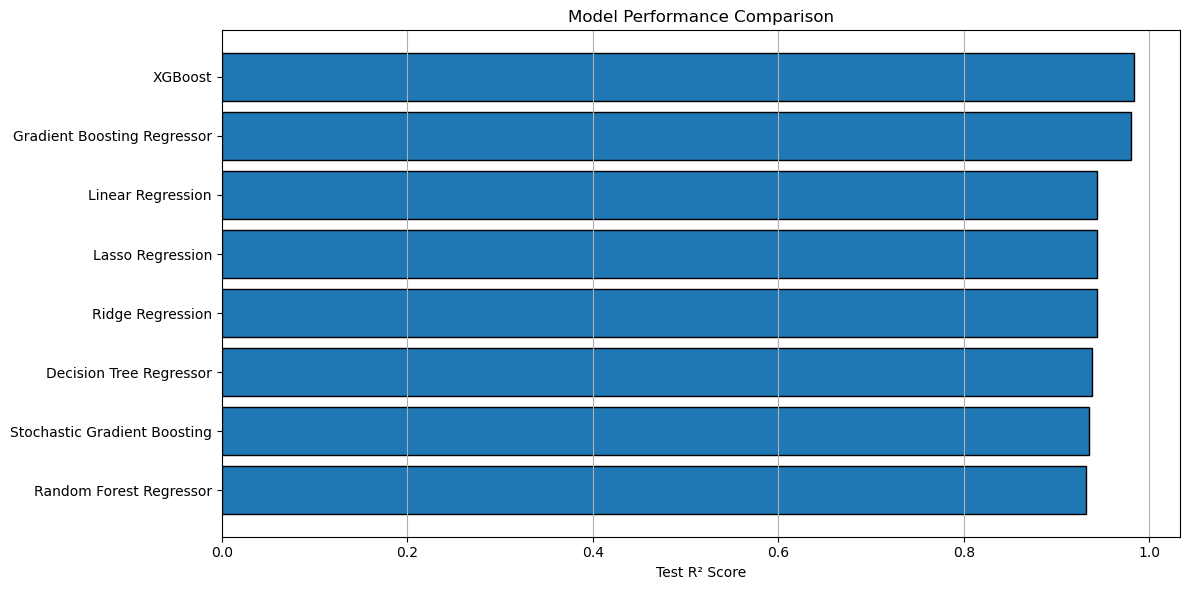

In [66]:
plt.figure(figsize=(12, 6))
plt.barh(results_df_sorted['Model'], results_df_sorted['Test R²'], edgecolor='black')
plt.xlabel('Test R² Score')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## Final Conclusion

- We built multiple models including Linear, Ridge, Lasso, Decision Trees, Random Forest, Gradient Boosting, and XGBoost.
- The **Gradient Boosting Regressor** and **XGBoost** emerged as top performers, both with Test R² > 0.96.
- The data was carefully preprocessed with feature scaling, one-hot encoding, and group-based aggregation.
- These models can now be integrated into a web app or business intelligence dashboard to aid in car resale decisions.


